*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 22-1:  Multi-linear regression of SAT scores

The SAT is a standardize test taken by high school students that is required for applying to many colleges.  The average SAT scores for NYC high schools in 2012 are availabe on NYC Open Data here: [https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)

Click "View Data", then "Export", and finally "Download" to download the data as a CSV file.

a) If 5 or fewer students took the SAT at a school, the scores are replaced with 's'.  Clean the data by dropping all rows containing s's.  We cleaned the Starbucks drink dataset in a simliar way in Labs 18 and 22.

b) To better understand the data, plot scatter plots for all pairs of numerical columns.  Hint: Use the `pairplot()` function from Lab 20

c) Compute a linear model where the writng SAT score is the dependent variable and the reading and math SAT scores are the independent variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
SAT = pd.read_csv("../../data/2012_SAT_Results.csv", na_values = ["s"])
SAT = SAT.dropna(axis = 0)
SAT

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112.0,332.0,557.0,316.0
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.0,522.0,574.0,525.0
7,01M650,CASCADES HIGH SCHOOL,18.0,417.0,418.0,411.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130.0,624.0,604.0,628.0
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16.0,395.0,400.0,387.0


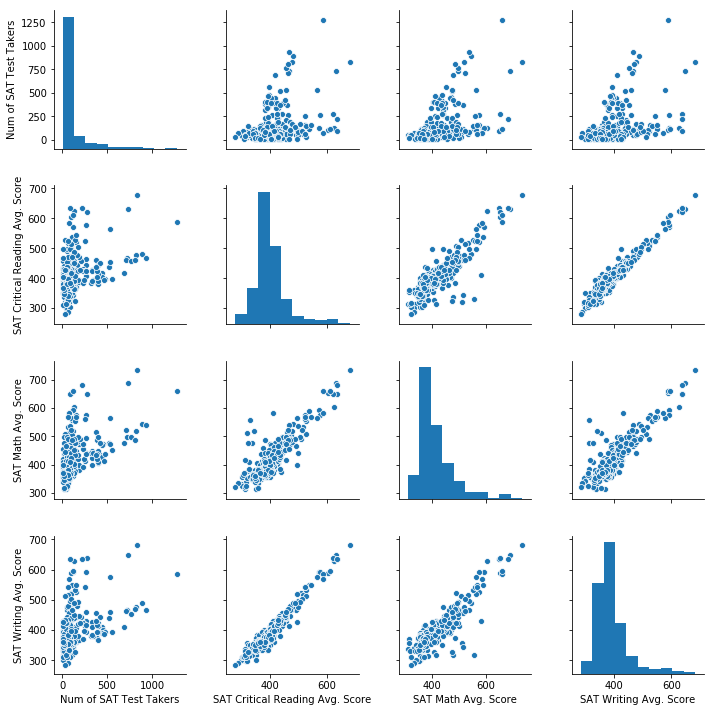

In [3]:
sns.pairplot(SAT)

In [6]:
SAT.columns = ["DBN", "School", "Num_test_takers","Reading","Math","Writing"]
SAT.head()

,DBN,School,Num_test_takers,Reading,Math,Writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0


In [7]:
lm = smf.ols(formula = "Writing ~ Reading + Math",data = SAT).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Writing   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3883.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          1.06e-270
Time:                        13:16:47   Log-Likelihood:                -1684.8
No. Observations:                 421   AIC:                             3376.
Df Residuals:                     418   BIC:                             3388.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9308      4.630     -2.145      0.033     -19.032      -0.830
Reading        0.8436      0.023     36.135      0.000       0.798       0.890
Math           0.1591      0.021      7.758      0.000       0.119       0.199
==============================================================================
Omnibus:                       30.577   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.946
Skew:                          -0.498   Prob(JB):                     2.35e-11
Kurtosis:                       4.341   Cond. No.                     4.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. What is the equation of the regression line?  Assume that $x_1$ is the SAT reading score and $x_2$ is the SAT math score.  You can write $x_1$ as x1 in your equation.
2. What is R-squared for your model?  Does this number indicate the model a good explanation for the data?
3. What does your model predict is the average SAT writing score when the average SAT reading and math scores are 510 and 530, respectively.

Write your answers below.

1. $y = -9.9308 +  0.8436 x_1 + 0.1591 x_2$
2. R-squared is 0.949.  This is very close to 1, so the model explains most of the variation in the data, and thus is a good explanation for the data.

In [8]:
new_info = pd.DataFrame({"Reading":[510], "Math":[530]})
lm.predict(new_info)

0    504.618245
dtype: float64

.3.  The model predict the average SAT math score would be 505.